In [ ]:
!git clone https://github.com/flexibo/DL2

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import sys

keras:  2.3.0-tf


Cloning into 'DL2'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [2]:
# read in the text file, transforming everything to lower case
text = open('/content/DL2/holmes.txt').read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562422 characters.



In [3]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]


"\ufeffthe adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as

In [4]:
# remove all '\n' and '\r' from text
text = text.replace('\n',' ') 
text = text.replace('\r','')

In [5]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
import re

def clean_text(text):
    letters_and_punctuation="abcdefghijklmnopqrstuvwxyz!,.:;?-' "

    # Enter your code here:
    for i in text:
      if i not in letters_and_punctuation:
        text = text.replace(i,'')
    
    text = re.sub(' +', ' ', text)
    return text


In [6]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle i. a scandal in bohemia ii. the red-headed league iii. a case of identity iv. the boscombe valley mystery v. the five orange pips vi. the man with the twisted lip vii. the adventure of the blue carbuncle viii. the adventure of the speckled band ix. the adventure of the engineer's thumb x. the adventure of the noble bachelor xi. the adventure of the beryl coronet xii. the adventure of the copper beeches adventure i. a scandal in bohemia i. to sherlock holmes she is always the woman. i have seldom heard him mention her under any other name. in his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. 

In [7]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

This document has 554097 total number of characters.
This document has 35 unique characters.


In [8]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels

def generate_text_io(text, window_size):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text) - window_size):
      inputs.append(text[i: i + window_size])
      labels.append(text[i + window_size])
    
    print('Number of sequences:', len(inputs))
    return inputs, labels

In [9]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [10]:
# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text,window_size): # window_size determines # of characters in each input
    inputs, labels= generate_text_io(text, window_size)
    # Enter your code here:
    print('Vectorization...')
    x = np.zeros((len(inputs), window_size, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, chars_to_indices[char]] = 1
            y[i, chars_to_indices[labels[i]]] = 1

    return x,y
    

In [11]:
# perform one-hot encoding of inputs and labels
window_size = 50
X, y = encode_io_pairs(text, window_size)

Number of sequences: 554047
Vectorization...


In [12]:
print(y.shape)

(554047, 35)


In [13]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 31)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [38]:
# Build the Model
# Enter your code here:
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

# Train the Model
# Enter your code here:
optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128) 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 128)               83968     
_________________________________________________________________
dense_15 (Dense)             (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3463/3463 [==============================] - 21s 6ms/step - loss: 1.6931 - acc: 0.4921
Epoch 2/30
3463/3463 [==============================] - 21s 6ms/step - loss: 1.4441 - acc: 0.5603
Epoch 3/30
3463/3463 [==============================] - 21s 6ms/step - loss: 1.3887 - acc: 0.5750
Epoch 4/30
3463/3463 [==============================] - 21s 6ms/step - loss: 1.3582 - acc: 0.5833
Epoch 5/30
3463/3463 [==============================] - 21s 6ms/step - loss: 1.3390 - acc: 0.5888
Epoch 6/30
3463/3463 

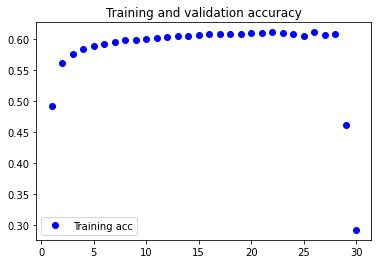

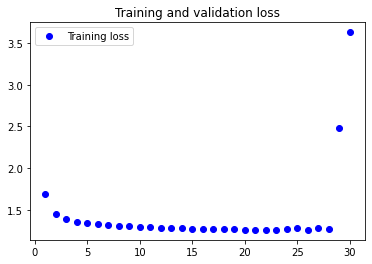

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()